<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 23

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* This simple tutorial is still based on a script I created for this article: https://imechanica.org/node/23957
* It follows from some examples provided by the scikit-learn user guide, which seem to have originated from Mathieu Blondel, Jake Vanderplas, Vincent Dubourg, and Jan Hendrik Metzen.
* Creating a new StandardScaler for Gaussian Processes: https://stats.stackexchange.com/questions/364418/how-to-get-the-prediction-std-using-gaussian-process-in-scikit-learn
* The flower to explain the Iris dataset comes from this [source](https://www.ritchieng.com/machine-learning-iris-dataset/)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Introduction to Generative Classification Models: Gaussian Discriminant analysis
 - Linear Discriminant Analysis (LDA)
 - Quadratic Discriminant Analysis (QDA)
 - Naive Bayes

**Reading material**: This notebook + Chapter 9

### Today: ditch Discriminative models!

Every machine learning model we saw so far in this course has been **discriminative**.

- Why?

Discriminative models are **not able to generate new input data** (i.e. new feature data).

Instead, **discriminative models** only predict new **output** data (i.e., new target data).

Mathematically, this means that the observation distribution of a **discriminative model** is of the form:

$$p(y|\mathbf{x}, \mathbf{z})$$

### Generative models

In contrast, **generative** models can predict new **input** data (and, if you want, also new **output** data!)

Mathematically, this means the **observation distribution** of a **<font color='red'>generative</font> (supervised) model** is of the form:

$$p(y,\mathbf{x}| \mathbf{z})$$

In other words, a sample from the observation distribution generates both an **input** and an **output** point.

- Note: The now widely famous "Large Language Models" (e.g. ChatGPT) are **generative *unsupervised* models**. These are more advanced models, and we probably won't discuss them explicitly in this course. Unsupervised models are simply models for which the observation distribution does not have $y$, i.e. it is written as: $p(\mathbf{x}| \mathbf{z})$


**Let me share with you the good news and the bad news about generative models...**

Here's the **great news**:

* Bayes rule is used *exactly* the same way as in discriminative models!
* No additional theory needed!

### Same old Bayes rule for generative supervised (and mostly also unsupervised) models

$\require{color}$
$$
{\color{green}p(\mathbf{z}|y, \mathbf{x})} = \frac{ {\color{blue}p(y,\mathbf{x}|\mathbf{z})}{\color{red}p(\mathbf{z})} } {p(y,\mathbf{x})} = \frac{ {\color{magenta}p(y,\mathbf{x}, \mathbf{z})} } {p(y,\mathbf{x})}
$$

and if we replace the available data for training (leading to likelihoods instead of distributions):

$$
{\color{green}p(\mathbf{z}|y=\mathcal{D}_y, \mathbf{x}=\mathcal{D}_x)} = \frac{ {\color{blue}p(y=\mathcal{D}_y,\mathbf{x}=\mathcal{D}_x|\mathbf{z})}{\color{red}p(\mathbf{z})} } {p(y=\mathcal{D}_y,\mathbf{x}=\mathcal{D}_x)} = \frac{ {\color{magenta}p(y=\mathcal{D}_y,\mathbf{x}=\mathcal{D}_x, \mathbf{z})} } {p(y=\mathcal{D}_y,\mathbf{x}=\mathcal{D}_x)}
$$

often abbreviated to:

$$
{\color{green}p(\mathbf{z}|\mathcal{D})} = \frac{ {\color{blue}p(\mathcal{D}|\mathbf{z})}{\color{red}p(\mathbf{z})} } {p(\mathcal{D})} = \frac{ {\color{magenta}p(\mathcal{D}, \mathbf{z})} } {p(\mathcal{D})}
$$

which makes it easy to see that it is exactly the same Bayes rule that we used in all the past lectures!

Here's the **bad news**:

* the observation distribution is a *bit* more complicated... 😼

Let's start with the simplest generative classification model: **Gaussian Discriminant Analysis**

* (It is unfortunate that this *generative* model has *discriminant* in its name 😳)

Recall that as a generative classification model, **Gaussian Discriminant Analysis (GDA)** predicts categorical outputs (target classes) by **generating** new input data (features).

### Gaussian Discriminant Analysis (GDA): a simple generative classification model

The **observation distribution** ${\color{blue}p(y,\mathbf{x}|\mathbf{z})}$ of GDA has the following form:

$${\color{blue}p(y,\mathbf{x}|\mathbf{z})} = \underbrace{\left(\prod_{c=1}^C p(\mathbf{x}|y=y_c, \boldsymbol{\theta}_c)^{\mathbb{1}(y=c)}\right)}_{p(\mathbf{x}|y, \boldsymbol{\theta})} p(y|\boldsymbol{\rho})$$

- The idea is to find a multivariate **Gaussian distribution for <font color='red'>each</font> class separately**:

$$p(\mathbf{x}| y=y_c, \boldsymbol{\theta}_c) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)$$

- and then associating a weight to each of those Gaussians, which is possible by considering the Categorical distribution (like we did last Lecture with multinomial logistic regression!):

$$p(y|\boldsymbol{\rho}) = \text{Cat}(y|\boldsymbol{\rho}) = \prod_{c=1}^C \rho_c^{\mathbb{1}(y=c)}$$

**Note**: Each term of the observation distribution has the product operator, but we can use the associative rule and only write one product operator.

$\begin{align}
{\color{blue}p(y,\mathbf{x}|\mathbf{z})} =& {\color{violet}p(\mathbf{x}|y, \boldsymbol{\theta})} {\color{brown}p(y|\boldsymbol{\rho})} \\
=& {\color{violet}\left(\prod_{c=1}^C p(\mathbf{x}|y=y_c, \boldsymbol{\theta}_c)^{\mathbb{1}(y=c)}\right)} {\color{brown}\left(\prod_{c=1}^C \rho_c^{\mathbb{1}(y=c)} \right)}\\
=& \prod_{c=1}^C p(\mathbf{x}|y=y_c, \boldsymbol{\theta}_c)^{\mathbb{1}(y=c)} \rho_c^{\mathbb{1}(y=c)}
\end{align}$

The **GDA model** is then summarized as follows:

1. Observation distribution: $$p(y,\mathbf{x}| \mathbf{z}) = \prod_{c=1}^C \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)^{\mathbb{1}(y=c)} \rho_c^{\mathbb{1}(y=c)}$$

    where all hidden rv's are: $\mathbf{z} = \left\{ \boldsymbol{\theta}_1, ..., \boldsymbol{\theta}_c, ..., \boldsymbol{\theta}_C, \boldsymbol{\rho} \right\}$ with $C$ being the total number of outputs (targets, classes or labels).
    - For clarity, $\boldsymbol{\theta}_c = \left\{ \boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c \right\}$ are the parameters of each multivariate Gaussian explaining the inputs of class $c$, while $\boldsymbol{\rho}=\left\{ \rho_1, ..., \rho_c,..., \rho_C \right\}$ are the parameters of the Categorical distribution that act as weights for each Guassian distribution of the corresponding class.


2. Prior distribution is uniform for all $\mathbf{z}$: $p(\mathbf{z}) \propto 1$


3. MLE point estimate for posterior: $\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i,\mathbf{x}=\mathbf{x}_i| \mathbf{z})}\right]$

The <font color='orange'>PPD</font> is: $\require{color}
{\color{orange}p(y^*,\mathbf{x}^*| \mathcal{D})} = \int p(y^*,\mathbf{x}^*|\mathbf{z}) \delta(\mathbf{z}-\hat{\mathbf{z}}) d\mathbf{z} = p(y^*,\mathbf{x}^*| \mathbf{z}=\hat{\mathbf{z}})$

And the final class $c^*$ prediction is given by the **mode** of the PPD: $c^* = \underset{y^*}{\mathrm{argmax}}\left[ p(y^*,\mathbf{x}^*| \mathbf{z}=\hat{\mathbf{z}}) \right]$

#### A few notes about the GDA model

Although we have seen all these terms before, I include here a few reminders:

$$\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)^{\mathbb{1}(y=c)}=\begin{cases}
      \begin{align} 1 & \quad \text{if } y \neq c\\
      \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c) & \quad \text{if }  y = c
      \end{align}
    \end{cases}$$

Likewise:

$$\rho_c^{\mathbb{1}(y=c)}=\begin{cases}
      \begin{align} 1 & \quad \text{if } y \neq c\\
      \rho_c & \quad \text{if }  y = c
      \end{align}
    \end{cases}$$
    
For example, if our data has 3 classes, then the observation distribution becomes:

$$p(y,\mathbf{x}| \mathbf{z}) = \left(\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_1,\boldsymbol{\Sigma}_1) \rho_1\right)^{\mathbb{1}(y=c)} \left(\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_2,\boldsymbol{\Sigma}_2) \rho_2\right)^{\mathbb{1}(y=c)} \left(\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_3,\boldsymbol{\Sigma}_3) \rho_3\right)^{\mathbb{1}(y=c)}$$

Depending on the value of $y$, for example if $y=2$, the distribution is then dependent on the data associated to class 2:

$$p(y=2,\mathbf{x}| \mathbf{z}) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_2,\boldsymbol{\Sigma}_2) \rho_2$$

#### Additional note: comparison with Logistic regression model (a simple *discriminative* classification model)

Remember the observation distribution for multinomial Logistic regression:

$$
p(y|\mathbf{x}, \mathbf{z}) = \text{Cat}\left(y|\boldsymbol{\rho}= \mathbf{f}(\mathbf{x},\mathbf{z}) \right)
$$

where we require that $0 \leq f_c(\mathbf{x},\mathbf{z}) \leq 1$ and $\sum_{c=1}^C f_c(\mathbf{x},\mathbf{z})=1$.

The softmax function does the same as the sigmoid, but for multiple classes:

$$
\text{softmax}(\mathbf{a}) = \left[ \frac{e^{a_1}}{\sum_{c'=1}^C e^{a_{c'}}}, \ldots, \frac{e^{a_C}}{\sum_{c'=1}^C e^{a_{c'}}} \right]
$$

which maps $\mathbb{R}^C$ to $[0,1]^C$ and satisfies the constraints that $0 \leq \text{softmax} \leq 1$ and $\sum_{c=1}^C \text{softmax}(\mathbf{a}_c)=1$.

### Calculating the point estimate (MLE) for GDA

As usual, we need to find the MLE of the GDA model.

First we calculate the negative log likelihood:

$\begin{align}
\text{NLL}(\mathbf{z}) =& -\log \left[\prod_{n=1}^N \left(\prod_{c=1}^C \mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)^{\mathbb{1}(y_n=c)} \rho_c^{\mathbb{1}(y_n=c)}\right)\right]\\
=& -\sum_{n=1}^N \log \left[\prod_{c=1}^C \mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)^{\mathbb{1}(y_n=c)} \rho_c^{\mathbb{1}(y_n=c)}\right]\\
=& -\sum_{c=1}^C\sum_{n=1}^N  {\mathbb{1}(y_n=c)}\log\left(\mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)\right) - \sum_{c=1}^C\sum_{n=1}^N {\mathbb{1}(y_n=c)} \log \rho_c \\
=& -\sum_{c=1}^C\sum_{n:y_n=c}  \log\left(\mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)\right) - \sum_{c=1}^C\sum_{n:y_n=c} \log \rho_c 
\end{align}
$

where the symbol $\sum_{n:y_n=c}$ indicates a sum over the number of times it occurs $y_n=c$. This makes it redundant to include the indicator function ${\mathbb{1}(y_n=c)}$ in the last line.

Then we find the MLE as usual by minimizing the NLL:

$
\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[\underbrace{-\sum_{c=1}^C\sum_{n:y_n=c}  \log\left(\mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_c,\boldsymbol{\Sigma}_c)\right)}_{\text{optimize for }(\boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c)} - \underbrace{\sum_{c=1}^C\sum_{n:y_n=c} \log \rho_c}_{\text{optimize for } \rho_c}\right]
$

where we note that we can **optimize each term separately** because they have different unknown rv's. This is very convenient because we can easily optimize each of these two terms!
- The first term is simply the MLE of a multivariate Gaussian with parameters $(\boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c)$:

 $\hat{\boldsymbol{\mu}}_c = \frac{1}{N_c}\sum_{n:y_n=c} \mathbf{x}_n$

 $\hat{\boldsymbol{\Sigma}}_c = \frac{1}{N_c} \sum_{n:y_n=c} (\mathbf{x}_n-\hat{\boldsymbol{\mu}}_c)(\mathbf{x}_n-\hat{\boldsymbol{\mu}}_c)^T$

- The second term is the MLE for the categorical distribution with parameters $\boldsymbol{\rho}$:

 $\hat{\rho}_c = \frac{N_c}{N}$

**Note**: The MLE for the multitvariate Gaussian is in Section 4.2.6 of the book, and the MLE for a categorical distribution is in Section 4.2.4

Having found the MLE of all parameters $\hat{\mathbf{z}} = \left\{ \hat{\boldsymbol{\theta}}_1, ..., \hat{\boldsymbol{\theta}}_c, ..., \hat{\boldsymbol{\theta}}_C, \hat{\boldsymbol{\rho}} \right\}$ relative to the $C$ classes, we can now calculate the PPD.

$$
{\color{orange}p(y^*,\mathbf{x}^*| \mathcal{D})} = \prod_{c=1}^C \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,\hat{\boldsymbol{\Sigma}}_c)^{\mathbb{1}(y^*=c)} \hat{\rho}_c^{\mathbb{1}(y^*=c)}
$$

So, we predict class $c^*$ for a given input point $\mathbf{x}^*$ is given by the **mode** of the PPD:

$\begin{align}
c^* =& \underset{y^*}{\mathrm{argmax}}\left[ p(y^*,\mathbf{x}^*| \mathbf{z}=\hat{\mathbf{z}}) \right]\\
=& \underset{y^*}{\mathrm{argmax}}\left[ \prod_{c=1}^C \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,\hat{\boldsymbol{\Sigma}}_c)^{\mathbb{1}(y^*=c)} \hat{\rho}_c^{\mathbb{1}(y^*=c)} \right]
\end{align}
$

- What if we wanted to generate a new input sample for a specific class $y^*=c^*$?

A new input sample $\mathbf{x}_{\text{new}}$ for a given class $y^*=c^*$ can also be predicted by the **mode** of the PPD :

$\begin{align}
\mathbf{x}_{\text{new}} =& \underset{\mathbf{x}^*}{\mathrm{argmax}}\left[ p(y^*=c^*,\mathbf{x}^*| \mathbf{z}=\hat{\mathbf{z}}) \right]\\
=& \underset{\mathbf{x}^*}{\mathrm{argmax}}\left[ \prod_{c=1}^C \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,\hat{\boldsymbol{\Sigma}}_c)^{\mathbb{1}(c^*=c)} \hat{\rho}_c^{\mathbb{1}(c^*=c)} \right]\\
=& \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_{c^*},\hat{\boldsymbol{\Sigma}}_{c^*}) \hat{\rho}_{c^*}
\end{align}
$

In other words: we can generate a new sample simply by sampling the corresponding Gaussian distribution of the class we want to sample (in this case $y=c^*$).

* Of all the models we saw so far in the course, this is really the first one that can **generate inputs**.

In [2]:
import pandas as pd

# Load the Iris dataset.
iris_data = pd.read_csv('../data/data_iris.csv')

# Let's only use the first two features (IGNORING THE OTHER 2).
X_2d_iris_data = iris_data.loc[:, ['SepalLengthCm','SepalWidthCm'] ].values # just use 2 inputs (features)
y_string_iris_data = iris_data.loc[:, 'Species'].values

y_iris_data = pd.Categorical(pd.factorize(y_string_iris_data)[0])

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# WARNING: I did not scale the data because this dataset is really simple, but NEVER do that!!!

QDA_model = QuadraticDiscriminantAnalysis() # Gaussian Discriminant Analysis model
                                            # Note that if not using regularization (if using a Uniform prior),
                                            # then there are no hyperparameters ;)

QDA_model.fit(X_2d_iris_data, y_iris_data) # HERE WE ARE USING ONLY 2 FEATURES TO FIT THE MODEL!
                                           # This is just to assess the predictive power of the SVC even though
                                           # it is only using 2 features for training.
                                           # REMEMBER: WE USUALLY USE ALL FEATURES WHEN TRAINING A MODEL.

QuadraticDiscriminantAnalysis()

In [4]:
from matplotlib import cm # to change colors of surface plots
n_classes = 3 # number of classes for this problem
plot_colors = 'ryb' # defining the 3 colors for each category
plot_step = 5e-3 # defining the meshgrid step size
target_names = iris_data.loc[:, 'Species'].unique() # retrieve the names of each category

# Create grid for plot:
x1_iris_data, x2_iris_data = X_2d_iris_data[:, 0], X_2d_iris_data[:, 1]

x1_iris_data_min, x1_iris_data_max = x1_iris_data.min() - 1, x1_iris_data.max() + 1 # define min & max of feature 0
x2_iris_data_min, x2_iris_data_max = x2_iris_data.min() - 1, x2_iris_data.max() + 1 # define min & max of feature 1
X1_iris_data_grid, X2_iris_data_grid = np.meshgrid(np.arange(x1_iris_data_min, x1_iris_data_max, plot_step),
                                                   np.arange(x2_iris_data_min, x2_iris_data_max, plot_step))
# Predict for grid points:
y_iris_data_QDA_pred = QDA_model.predict(np.c_[X1_iris_data_grid.ravel(), X2_iris_data_grid.ravel()])
Y_iris_data_QDA_grid = y_iris_data_QDA_pred.reshape(X1_iris_data_grid.shape)

fig1, ax1 = plt.subplots(tight_layout=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1.contourf(X1_iris_data_grid, X2_iris_data_grid, Y_iris_data_QDA_grid, cmap=cm.RdYlBu, alpha=0.8)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_iris_data == i)
    ax1.scatter(X_2d_iris_data[idx, 0], X_2d_iris_data[idx, 1], c=color,
                label=target_names[i], edgecolor='black', s=15)

ax1.set_xlim(X1_iris_data_grid.min(), X1_iris_data_grid.max())
ax1.set_ylim(X2_iris_data_grid.min(), X2_iris_data_grid.max())
ax1.set_xlabel('Sepal length', fontsize=20)
ax1.set_ylabel('Sepal width', fontsize=20)
#ax1.set_xticks(())
#ax1.set_yticks(())
ax1.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=15)
ax1.set_title('Gaussian Discriminant Analysis (a.k.a. Quadratic Discriminant Analysis)', fontsize=20)
plt.close(fig1)

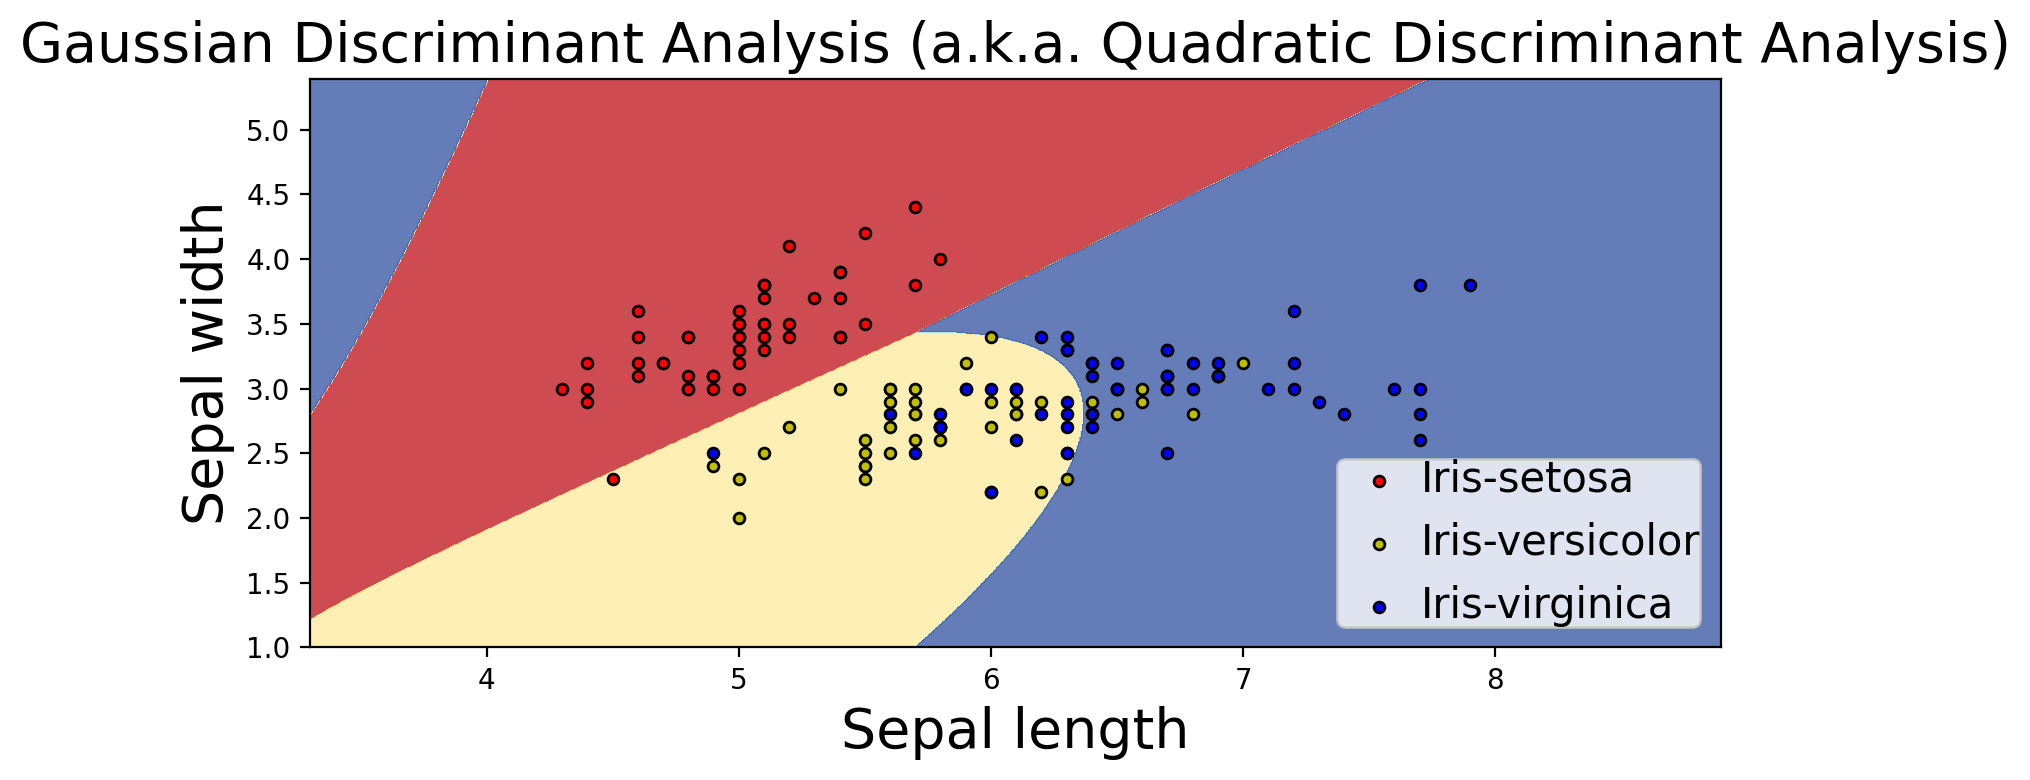

In [5]:
fig1

### The three GDA models: QDA vs. LDA vs. Naive Bayes

The Gaussian Discriminant Analysis (GDA) model we just derived is actually called **Quadratic Discriminant Analysis (QDA)** because it generates quadratic boundaries.

* Recall that the PPD for QDA is:

$$
{\color{orange}p(y^*,\mathbf{x}^*| \mathcal{D})} = \prod_{c=1}^C \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,\hat{\boldsymbol{\Sigma}}_c)^{\mathbb{1}(y^*=c)} \hat{\rho}_c^{\mathbb{1}(y^*=c)}
$$

If we force all Gaussian distributions of each class to have **the same covariance matrix**, then the GDA model is called **Linear Discriminant Analysis (LDA)** because it generates linear boundaries.

* So, the PPD for LDA is a little simpler, because $\hat{\boldsymbol{\Sigma}}_c = \hat{\boldsymbol{\Sigma}}$ for all classes $c$:

$$
{\color{orange}p(y^*,\mathbf{x}^*| \mathcal{D})} = \prod_{c=1}^C \mathcal{N}(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,{\color{red}\hat{\boldsymbol{\Sigma}}})^{\mathbb{1}(y^*=c)} \hat{\rho}_c^{\mathbb{1}(y^*=c)}
$$

In addition, if the covariance matrices of each class are not only **equal but also diagonal**, then the GDA model is called **Naive Bayes**.

* So, the PPD for Naive Bayes becomes even simpler:

$$
{\color{orange}p(y^*,\mathbf{x}^*| \mathcal{D})} = \prod_{c=1}^C \mathcal{N}\left(\mathbf{x}^*|\hat{\boldsymbol{\mu}}_c,{\color{red}\text{diag}\left(\hat{\boldsymbol{\Sigma}}\right)}\right)^{\mathbb{1}(y^*=c)} \hat{\rho}_c^{\mathbb{1}(y^*=c)}
$$

The scikit-learn library has a nice example that compares the LDA vs. QDA predictions for 3 different datasets (code is not shown for brevity).

Let's discuss the next figure and see if the difference is clear...

In [6]:
# I adapted the scikit-learn example by considering different values and less points, but the code is the same.

def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ cov_class_1,
            rng.randn(n_samples, n_features) @ cov_class_2 + np.array([1, 1])*3.0,
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y

In [7]:
covariance = np.array([[1, 0], [0, 1]])
X_isotropic_covariance, y_isotropic_covariance = make_data(
    n_samples=50,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
covariance = np.array([[0.25, 2.0], [2.0, 1.0]])
X_shared_covariance, y_shared_covariance = make_data(
    n_samples=50,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
cov_class_1 = np.array([[0.3, 0.8], [0.8, 0.7]])
cov_class_2 = np.array([[0.2, -1.3], [-1.3, 1.8]])
X_different_covariance, y_different_covariance = make_data(
    n_samples=50,
    n_features=2,
    cov_class_1=cov_class_1,
    cov_class_2=cov_class_2,
    seed=0,
)


In [8]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay


def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

In [9]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

fig, axs = plt.subplots(nrows=3, ncols=2, sharex="row", sharey="row", figsize=(8, 12))

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

for ax_row, X, y in zip(
    axs,
    (X_isotropic_covariance, X_shared_covariance, X_different_covariance),
    (y_isotropic_covariance, y_shared_covariance, y_different_covariance),
):
    lda.fit(X, y)
    plot_result(lda, X, y, ax_row[0])
    qda.fit(X, y)
    plot_result(qda, X, y, ax_row[1])

axs[0, 0].set_title("Linear Discriminant Analysis")
axs[0, 0].set_ylabel("Each class has same spherical covariance")
axs[1, 0].set_ylabel("Each class has same covariance")
axs[0, 1].set_title("Quadratic Discriminant Analysis")
axs[2, 0].set_ylabel("Each class has different covariances")
fig.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.94,
    fontsize=15,
)
plt.close(fig)
#plt.show()


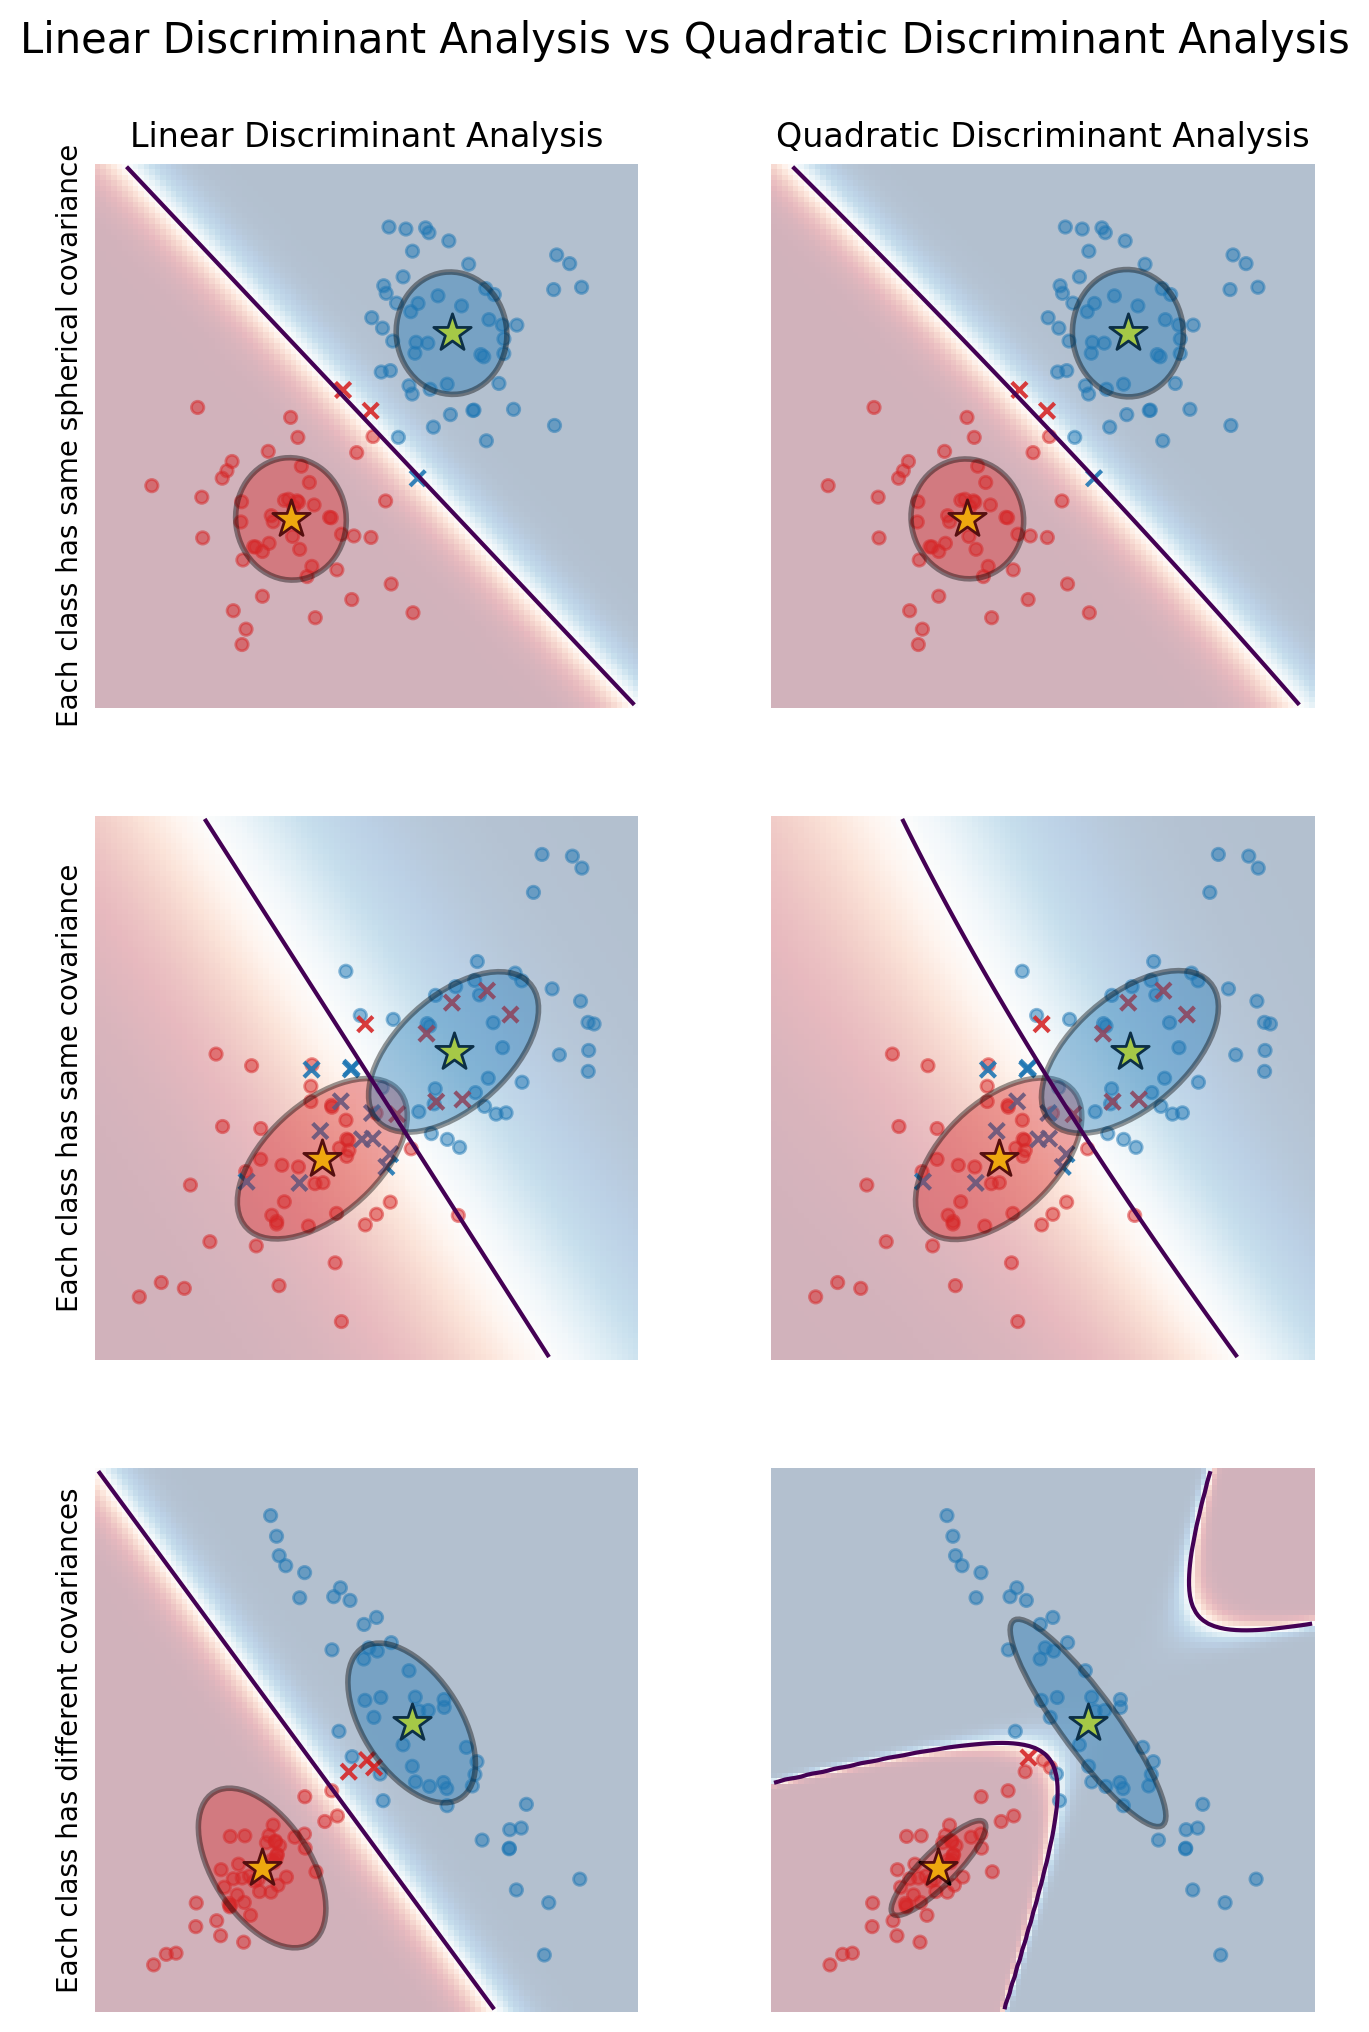

In [10]:
fig

**Question**:

* If the data in each class leads to a Gaussian with the same covariance matrix (figures in the first two rows), then LDA and QDA make the same prediction. Why do we see a small difference in the decision boundary for the figures on the second row?

The data was artificially created from sampling Gaussian distributions with the same variance, but when you fit each Gaussian the empirical covariances will be very similar but not exactly the same 😉

### See you next class

Have fun!